load the packages and read the data set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#import datetime as dt
from dateutil.parser import parse
from numpy import inf
import matplotlib.pyplot as plt
import seaborn as sns
#from scipy.optimize import newton
#from scipy.special import psi, polygamma
from scipy.stats import norm, kde, kstest
from numpy import inf,linspace
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import math
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('google_drive_nanreplaced.csv')

In [2]:
df.head()

,time,1day_active_users,1day_google_documents_active_users,1day_google_drawings_active_users,1day_google_forms_active_users,1day_google_presentations_active_users,1day_google_sites_active_users,1day_google_spreadsheets_active_users,1day_other_types_active_users,30day_active_users,...,owned_items_with_visibility_unknown_delta,owned_items_with_visibility_unknown_removed,owned_other_types_added,owned_other_types_created,owned_other_types_delta,owned_other_types_edited,owned_other_types_removed,owned_other_types_trashed,owned_other_types_viewed,sharers
0,2017-03-12 05:00:00,1543.0,2499.954068,7.240157,54.104987,474.077428,25.604369,1107.56168,1314.187664,15955.695538,...,0.0,0.0,0.0,3509.0,0.0,193.0,0.0,173.0,1173.0,0.0
1,2017-03-14 04:00:00,2495.0,2499.954068,7.240157,54.104987,474.077428,25.604369,1107.56168,1314.187664,15955.695538,...,0.0,0.0,0.0,6275.0,0.0,837.0,0.0,1018.0,1759.0,0.0
2,2017-03-16 04:00:00,2403.0,2499.954068,7.240157,54.104987,474.077428,25.604369,1107.56168,1314.187664,15955.695538,...,0.0,0.0,0.0,22084.0,0.0,820.0,0.0,805.0,1451.0,0.0
3,2017-03-19 04:00:00,2848.0,2499.954068,7.240157,54.104987,474.077428,25.604369,1107.56168,1314.187664,15955.695538,...,0.0,0.0,0.0,51355.0,0.0,725.0,0.0,737.0,1247.0,0.0
4,2017-03-20 04:00:00,5302.0,2499.954068,7.240157,54.104987,474.077428,25.604369,1107.56168,1314.187664,15955.695538,...,0.0,0.0,0.0,9979.0,0.0,1330.0,0.0,924.0,2339.0,0.0


Load the required attributes to dataframes

In [3]:
data1= df[['time', 'google_presentations_created']]
data2= df[['time', 'google_presentations_edited']]
data1.head()

,time,google_presentations_created
0,2017-03-12 05:00:00,0.0
1,2017-03-14 04:00:00,0.0
2,2017-03-16 04:00:00,0.0
3,2017-03-19 04:00:00,0.0
4,2017-03-20 04:00:00,0.0


In [4]:
data1.describe()

,google_presentations_created
count,831.000000
mean,105.248705
std,89.952533
min,0.000000
25%,36.000000
50%,79.000000
75%,153.000000
max,465.000000


In [5]:
data2.describe()

,google_presentations_edited
count,831.000000
mean,236.528497
std,211.152821
min,0.000000
25%,73.000000
50%,178.000000
75%,330.000000
max,1116.000000


In [6]:
data2.describe()

,google_presentations_edited
count,831.000000
mean,236.528497
std,211.152821
min,0.000000
25%,73.000000
50%,178.000000
75%,330.000000
max,1116.000000


Plotting histograms of the two attributes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016C06E29160>]],
      dtype=object)

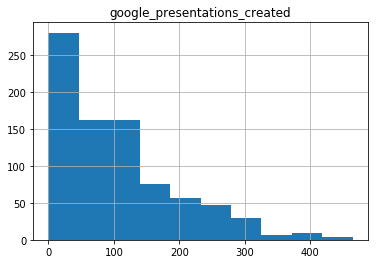

In [7]:
data1.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016C06CB32E8>]],
      dtype=object)

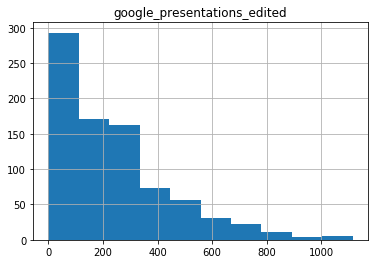

In [8]:
data2.hist()

In [9]:
data1['time'] = pd.to_datetime(data1['time'],utc=True)
data1.set_index('time', inplace=True)

Plotting the linegraphs of two attributes

Text(0.5, 0, 'Year')

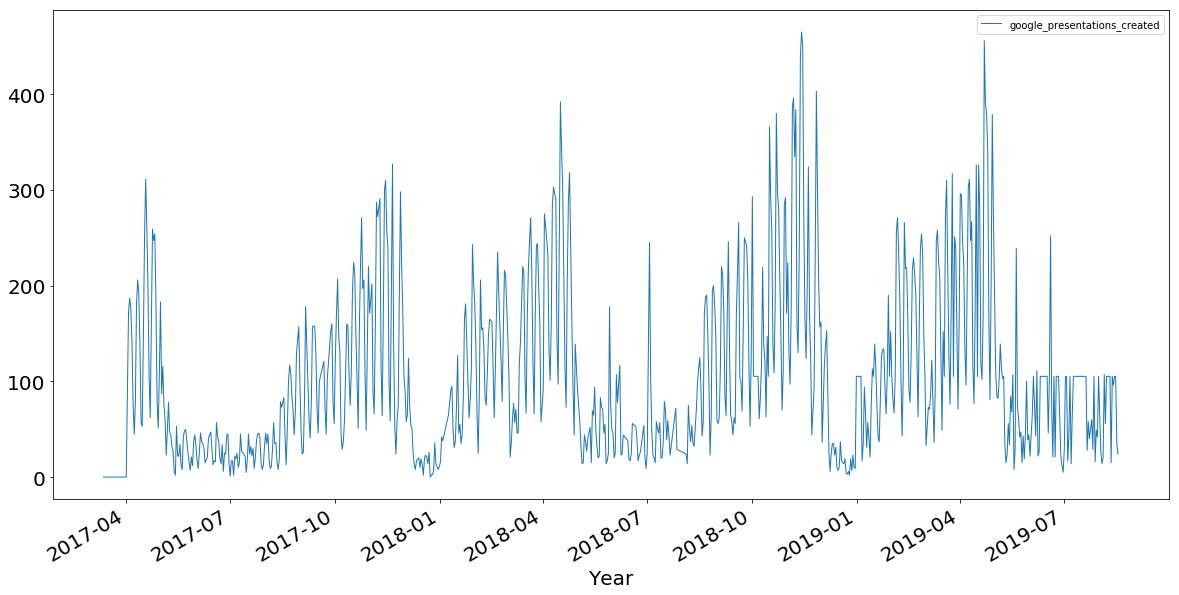

In [10]:
data1.plot(figsize=(20,10), linewidth=1, fontsize=20)
plt.xlabel('Year', fontsize=20)

In [11]:
data2['time'] = pd.to_datetime(data2['time'],utc=True)
data2.set_index('time', inplace=True)

Text(0.5, 0, 'Year')

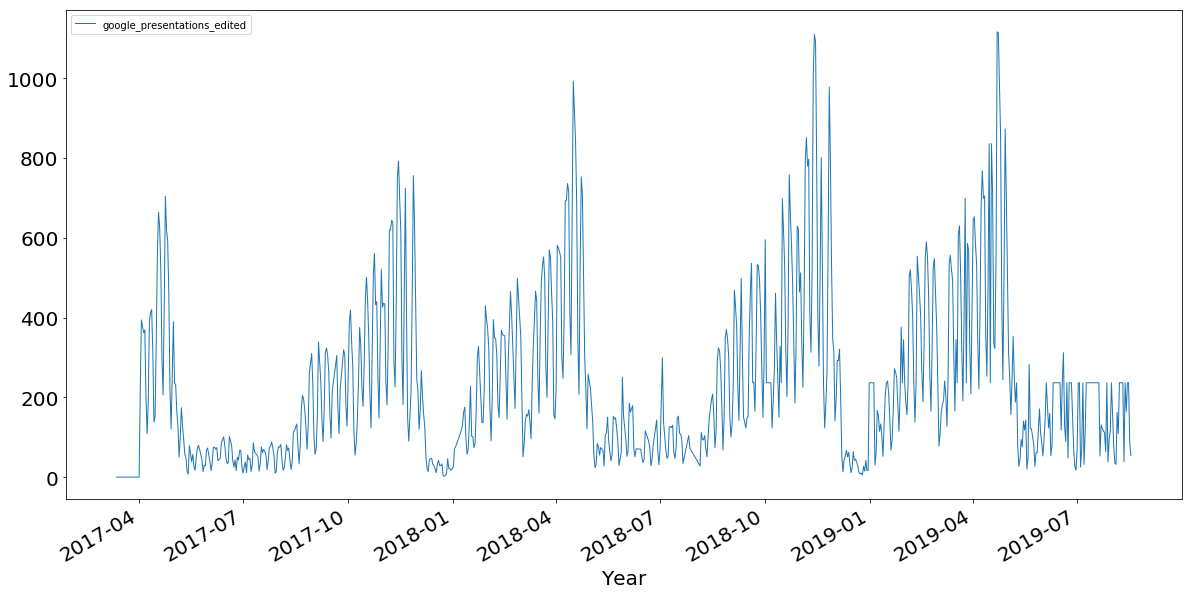

In [12]:
data2.plot(figsize=(20,10), linewidth=1, fontsize=20)
plt.xlabel('Year', fontsize=20)

In [13]:
alpha= norm.fit(df['google_presentations_created'])[0]
beta= norm.fit(df['google_presentations_created'])[1]
oiu= df['google_presentations_created']
density= kde.gaussian_kde(oiu,bw_method=None)

Fitting the distribution model to both the attributes, both the attributes follow poisson distribution, it is tested using the kernel density estimator

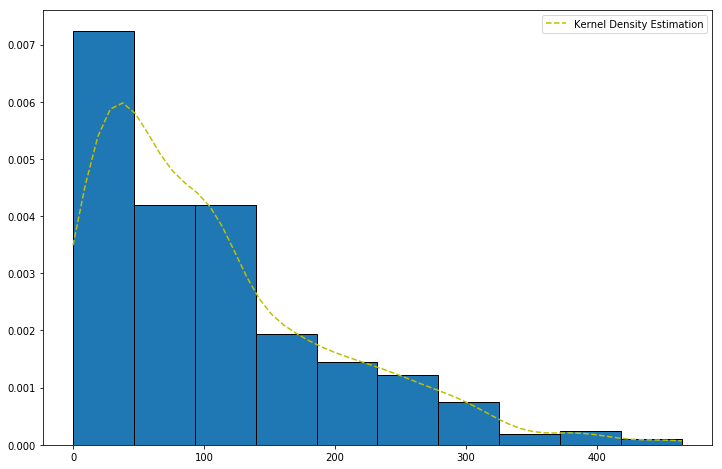

In [14]:
import numpy as np
oiu.hist(normed=True, bins=10, grid=False, ec='black', figsize=(12,8))
x = np.linspace(0, oiu.max())
xgrid = np.linspace(x.min(), x.max(), 100)
l3, = plt.plot(x, density(x), 'y--', label="Kernel Density Estimation")
plt.legend(handles=[l3])

In [15]:
my_cdf = lambda ary: np.array([density.integrate_box_1d(-np.inf, x) for x in ary])

In [16]:
kstest(oiu,my_cdf)

KstestResult(statistic=0.0654235087365719, pvalue=0.0015505461851881286)

In [20]:
alpha= norm.fit(df['google_presentations_edited'])[0]
beta= norm.fit(df['google_presentations_edited'])[1]
oiu= df['google_presentations_edited']
density= kde.gaussian_kde(oiu,bw_method=None)

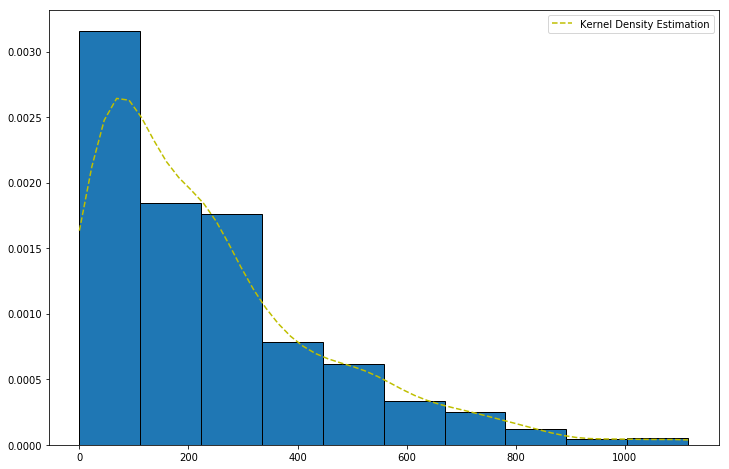

In [21]:
import numpy as np
oiu.hist(normed=True, bins=10, grid=False, ec='black', figsize=(12,8))
x = np.linspace(0, oiu.max())
xgrid = np.linspace(x.min(), x.max(), 100)
l3, = plt.plot(x, density(x), 'y--', label="Kernel Density Estimation")
plt.legend(handles=[l3])

It is a good model as the pvalue is very low.

In [22]:
my_cdf = lambda ary: np.array([density.integrate_box_1d(-np.inf, x) for x in ary])
kstest(oiu,my_cdf)

KstestResult(statistic=0.07234300663974617, pvalue=0.0003155917822745824)

In [23]:
data1= df['google_presentations_created']
users_sample= np.random.choice(a= data1,size= 300)
print(users_sample.mean())

95.03823834196892


In [24]:
data1.mean()-users_sample.mean()

10.210466321243757

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016C07151400>]],
      dtype=object)

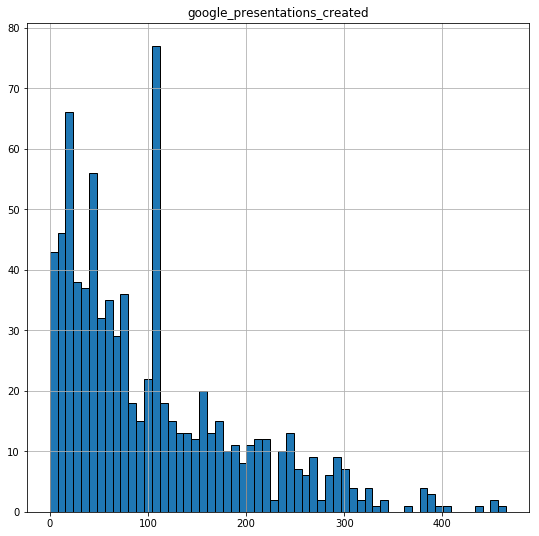

In [25]:
pd.DataFrame(data1).hist(bins=58,figsize=(9,9), ec='black')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016C07141EB8>]],
      dtype=object)

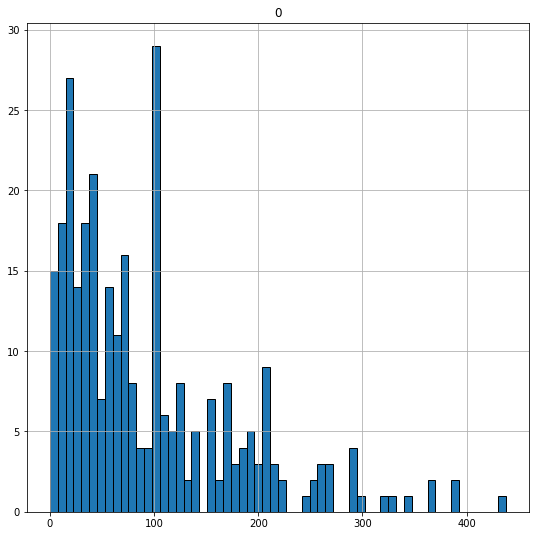

In [26]:
pd.DataFrame(users_sample).hist(bins=58,figsize=(9,9), ec='black')

Plotted the means of the samples which follows normal distribution

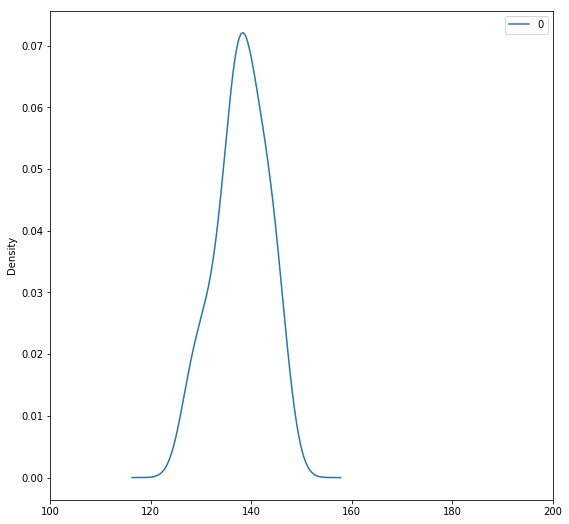

In [27]:
point_estimates = []         # Make empty list to hold point estimates
data1=df['google_spreadsheets_created']
for x in range(50):         # Generate 300 samples
    sample = np.random.choice(a= data1, size=300)
    point_estimates.append(sample.mean())
    
pd.DataFrame(point_estimates).plot(kind="density",  # Plot sample mean density
                                   figsize=(9,9),
                                   xlim=(100,200)) 

In [28]:
data1.mean()- np.array(point_estimates).mean()

0.5628044905003833

Calculate dthe t-critical value and the z-critical value for the attributes

In [29]:
np.random.seed(10)

sample_size = 300
sample = np.random.choice(a= data1, size = sample_size)
sample_mean = sample.mean()

z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*

print("z-critical value:")              # Check the z-critical value
print(z_critical)                        

users_stdev = data1.std()  # Get the population standard deviation

margin_of_error = z_critical * (users_stdev/math.sqrt(sample_size))

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Sample Mean:")
print(sample_mean)

print("Confidence interval:")
print(confidence_interval)

z-critical value:
1.959963984540054
Sample Mean:
137.46804835924004
Confidence interval:
(127.92711837049586, 147.00897834798423)


In [30]:
np.random.seed(12)

sample_size = 300

intervals = []
sample_means = []

for sample in range(25):
    sample = np.random.choice(a= data1, size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

    z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*         

    users_stdev = data1.std()  # Get the population standard deviation

    stats.norm.ppf(q = 0.025)

    margin_of_error = z_critical * (users_stdev/math.sqrt(sample_size))

    confidence_interval = (sample_mean - margin_of_error,
                           sample_mean + margin_of_error)  
    
    intervals.append(confidence_interval)

Plotte dthe confidence intervals for the attributes

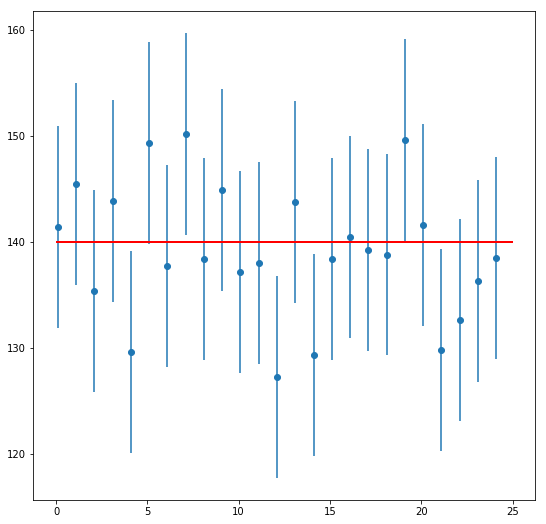

In [31]:
plt.figure(figsize=(9,9))

plt.errorbar(x=np.arange(0.1, 25, 1), 
             y=sample_means, 
             yerr=[(top-bot)/2 for top,bot in intervals],
             fmt='o')

plt.hlines(xmin=0, xmax=25,
           y=140, 
           linewidth=2.0,
           color="red")

In [32]:
np.random.seed(10)

sample_size = 300
sample = np.random.choice(a= data1, size = sample_size)
sample_mean = sample.mean()

t_critical = stats.t.ppf(q = 0.975, df=299)  # Get the t-critical value*

print("t-critical value:")                  # Check the t-critical value
print(t_critical)                        

sample_stdev = sample.std()    # Get the sample standard deviation

sigma = sample_stdev/math.sqrt(sample_size)  # Standard deviation estimate
margin_of_error = t_critical * sigma

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)

t-critical value:
1.9679296690653618
Confidence interval:
(128.22319591853835, 146.71290079994174)


In [33]:
# Check the difference between critical values with a sample size of 300
             
stats.t.ppf(q=0.975, df= 299) - stats.norm.ppf(0.975)  

0.00796568452530777

In [34]:
stats.t.interval(alpha = 0.95,              # Confidence level
                 df= 299,                    # Degrees of freedom
                 loc = sample_mean,         # Sample mean
                 scale = sigma)             # Standard deviation estimate

(128.22319591853835, 146.71290079994174)

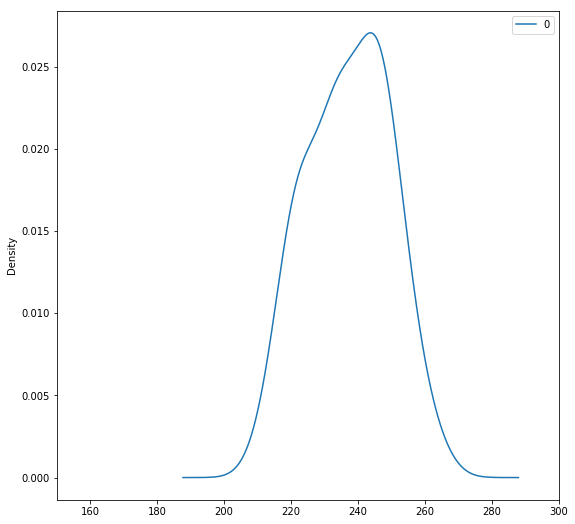

In [36]:
point_estimates = []         # Make empty list to hold point estimates
data2=df['google_presentations_edited']
for x in range(50):         # Generate 300 samples
    sample = np.random.choice(a= data2, size=300)
    point_estimates.append(sample.mean())
    
pd.DataFrame(point_estimates).plot(kind="density",  # Plot sample mean density
                                   figsize=(9,9),
                                   xlim=(150,300)) 

In [37]:
np.random.seed(10)

sample_size = 300
sample = np.random.choice(a= data2, size = sample_size)
sample_mean = sample.mean()

z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*

print("z-critical value:")              # Check the z-critical value
print(z_critical)                        

users_stdev = data1.std()  # Get the population standard deviation

margin_of_error = z_critical * (users_stdev/math.sqrt(sample_size))

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Sample Mean:")
print(sample_mean)

print("Confidence interval:")
print(confidence_interval)

z-critical value:
1.959963984540054
Sample Mean:
253.35070811744387
Confidence interval:
(243.8097781286997, 262.89163810618805)


In [38]:
np.random.seed(12)

sample_size = 300

intervals = []
sample_means = []

for sample in range(25):
    sample = np.random.choice(a= data2, size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

    z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*         

    users_stdev = data1.std()  # Get the population standard deviation

    stats.norm.ppf(q = 0.025)

    margin_of_error = z_critical * (users_stdev/math.sqrt(sample_size))

    confidence_interval = (sample_mean - margin_of_error,
                           sample_mean + margin_of_error)  
    
    intervals.append(confidence_interval)

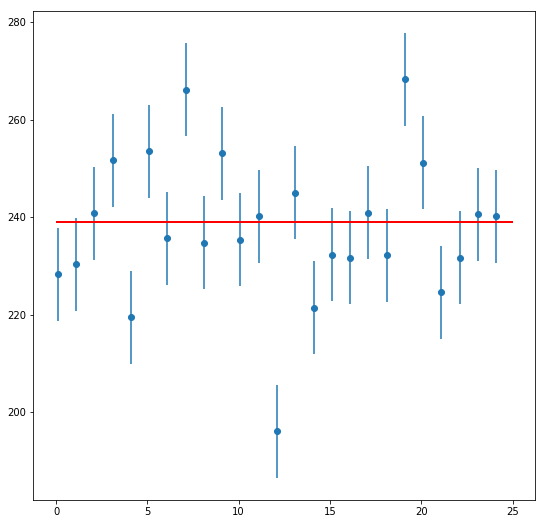

In [42]:
plt.figure(figsize=(9,9))

plt.errorbar(x=np.arange(0.1, 25, 1), 
             y=sample_means, 
             yerr=[(top-bot)/2 for top,bot in intervals],
             fmt='o')

plt.hlines(xmin=0, xmax=25,
           y=239, 
           linewidth=2.0,
           color="red")

In [43]:
np.random.seed(10)

sample_size = 300
sample = np.random.choice(a= data2, size = sample_size)
sample_mean = sample.mean()

t_critical = stats.t.ppf(q = 0.975, df=299)  # Get the t-critical value*

print("t-critical value:")                  # Check the t-critical value
print(t_critical)                        

sample_stdev = sample.std()    # Get the sample standard deviation

sigma = sample_stdev/math.sqrt(sample_size)  # Standard deviation estimate
margin_of_error = t_critical * sigma

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)

t-critical value:
1.9679296690653618
Confidence interval:
(227.26330572416384, 279.4381105107239)


In [44]:
# Check the difference between critical values with a sample size of 300
             
stats.t.ppf(q=0.975, df= 299) - stats.norm.ppf(0.975)  

0.00796568452530777

In [45]:
pd.DataFrame(df.groupby('time')['google_spreadsheets_created'].count()).sum()

google_spreadsheets_created    831
dtype: int64

In [46]:
z_critical = stats.norm.ppf(0.975)      # Record z-critical value

p = 0.831                              # Point estimate of proportion

n = 300                                # Sample size

margin_of_error = z_critical * math.sqrt((p*(1-p))/n)

confidence_interval = (p - margin_of_error,  # Calculate the the interval
                       p + margin_of_error) 

confidence_interval

(0.7885936075840971, 0.8734063924159028)

In [47]:
stats.norm.interval(alpha = 0.95,    # Confidence level             
                   loc =  0.831,     # Point estimate of proportion
                   scale = math.sqrt((p*(1-p))/n))  # Scaling factor

(0.7885936075840971, 0.8734063924159028)

In [48]:

data1=df['google_presentations_created']
data2=df['google_presentations_edited']
np.cov(data1, data2)[0,1]

18615.663287346277

In [49]:
print('Covariance of X and Y: %.2f'%np.cov(data1, data2)[0, 1])
print('Correlation of X and Y: %.2f'%np.corrcoef(data1, data2)[0, 1])

Covariance of X and Y: 18615.66
Correlation of X and Y: 0.98


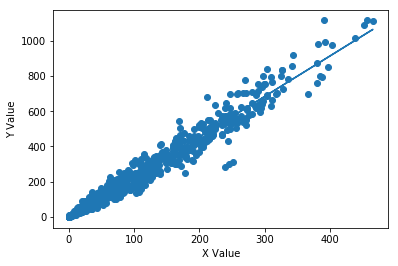

Correlation of X and Y: 0.98


In [50]:
X = data1
Y = data2

m, b = np.polyfit(X, Y, 1)

plt.scatter(X,Y)
plt.xlabel('X Value')
plt.ylabel('Y Value')
plt.plot(X, m*X + b, '-')
plt.show()
print('Correlation of X and Y: %.2f'%np.corrcoef(X, Y)[0, 1])

In [51]:
datasample_forms_created= np.random.choice(a= data1, size = 300)

In [52]:
datasample_forms_edited= np.random.choice(a= data2, size = 300)

In [53]:
data = df[['time','google_presentations_created']]

data['time'] = pd.to_datetime(data['time'],utc=True)
data.set_index('time', inplace=True)
data.head()

,google_presentations_created
time,
2017-03-12 05:00:00+00:00,0.0
2017-03-14 04:00:00+00:00,0.0
2017-03-16 04:00:00+00:00,0.0
2017-03-19 04:00:00+00:00,0.0
2017-03-20 04:00:00+00:00,0.0


In [54]:
data_17= data.append(data['2017'])
data_17.describe()

,google_presentations_created
count,1109.000000
mean,98.365801
std,87.890745
min,0.000000
25%,29.000000
50%,72.000000
75%,147.000000
max,465.000000


In [55]:
data_17.head()

,google_presentations_created
time,
2017-03-12 05:00:00+00:00,0.0
2017-03-14 04:00:00+00:00,0.0
2017-03-16 04:00:00+00:00,0.0
2017-03-19 04:00:00+00:00,0.0
2017-03-20 04:00:00+00:00,0.0


In [56]:
data_18= data.append(data['2018'])
data_18.describe()

,google_presentations_created
count,1159.000000
mean,109.002298
std,91.971699
min,0.000000
25%,37.000000
50%,83.000000
75%,159.000000
max,465.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016C0BB1C278>]],
      dtype=object)

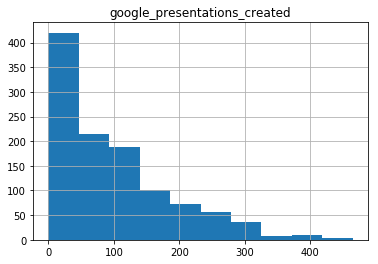

In [57]:
data_17.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016C0BB1C048>]],
      dtype=object)

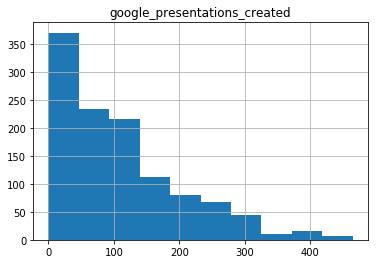

In [58]:
data_18.hist()

In [59]:

stats.ttest_1samp(a=data_17,               # Sample data
                 popmean= data.mean())  # Pop mean

Ttest_1sampResult(statistic=google_presentations_created   -2.60792
dtype: float64, pvalue=array([0.00923192]))

P value is 0.0092< 0.05, so we can reject the null hypothesis, and can say that the data of 2017 presentations is differ from the overall data of presentations 

In [61]:

stats.ttest_1samp(a=data_18,               # Sample data
                 popmean= data.mean())  # Pop mean

Ttest_1sampResult(statistic=google_presentations_created    1.389424
dtype: float64, pvalue=array([0.16497103]))

Here the p value is 0.16> 0.05, so we fail to reject the null hypothesis, it means the data of 2018 googlle presentations is similar to the overall data.


In [62]:
print(data_17.mean())
print(data_18.mean())

google_presentations_created    98.365801
dtype: float64
google_presentations_created    109.002298
dtype: float64


In [63]:
stats.ttest_ind(a= data_17,
                b=data_18,
                equal_var=False) 

Ttest_indResult(statistic=array([-2.81630411]), pvalue=array([0.00490002]))

here p value is 0.04< 0.05, so we reject the null hypothesis, so there is difference in 2017 data of presentations and 2018 data for presentations.